# Импортируем данные

Идеи/примеры/подсказки по работе с matplotlib, seaborn, pandas:
* https://matplotlib.org/stable/gallery/index.html
* https://seaborn.pydata.org/
* https://pandas.pydata.org/docs/user_guide/visualization.html



---



In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

In [77]:
pd.set_option('display.max_columns', 500)

Датасет лежит по ссылке: https://drive.google.com/file/d/18Q2u8KS2s2Ow8IEwp1n7wHUJs8GOocKL/view?usp=sharing

In [78]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')



---



# Основная информация о данных

Первые 5 строк:

In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Поля в датафрейме:

*   customerID - идентификатор клиента
*   gender - пол
* SeniorCitizen - флаг пенсионера
* Partner - флаг наличия семейных отношений
* Dependents - флаг наличия иждивенцев в семье
* tenure -количество месяцев, которое клиент остается с кампанией
* PhoneService - флаг подключения телефонных сервисов
** MultipleLines - флаг подключения нескольких телефонных линий
* InternetService - тип интернета, предоставляемого провайдером
** OnlineSecurity - флаг подключения онлайн защиты
** OnlineBackup - флаг наличия онлайнового резервного копирования
** DeviceProtection - флаг подключения защиты устройства
** TechSupport - флаг наличия технической поддержки
** StreamingTV - флаг наличия ТВ
** StreamingMovies - флаг наличия доступа к фильмам
* Contract- тип контракта
* PaperlessBilling - флаг выставления электронного счета
* PaymentMethod - способ оплаты
* MonthlyCharges - расмер месячной платы за услуги
* TotalCharges - выплачено клиентом за все время жизни в компании
* Churn - флаг оттока 




Размер датафрейма:

In [80]:
df.shape

(7043, 21)

Информация о столбцах:

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
# для начала приводим TotalCharges из строкового типа в число
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
# coerce - все пропуски будут заменены на NaN. NaN имеет тип float

In [83]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## My small EDA

In [84]:
sns.set_palette("Set2")

In [85]:
df['Churn'].replace(['No', 'Yes'], [0, 1], inplace=True)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

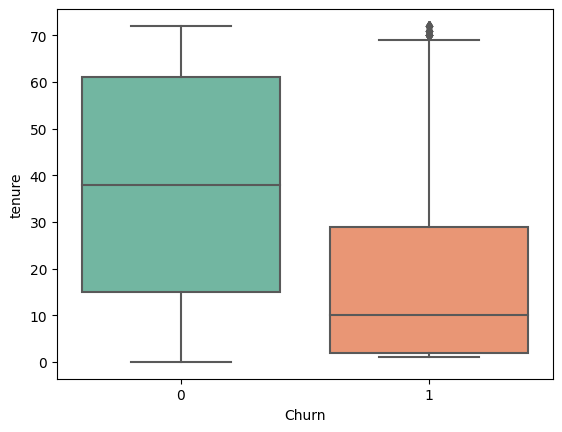

In [86]:
sns.boxplot(data = df, x = "Churn", y = "tenure")

Чем меньше месяцев с нами клиент, тем выше вероятность того, что он отвалится

In [87]:
df.groupby('gender')['TotalCharges'].sum()

gender
Female    7952354.2
Male      8103814.5
Name: TotalCharges, dtype: float64

In [88]:
df.groupby('Contract')['TotalCharges'].sum()

Contract
Month-to-month    5305861.5
One year          4467053.5
Two year          6283253.7
Name: TotalCharges, dtype: float64

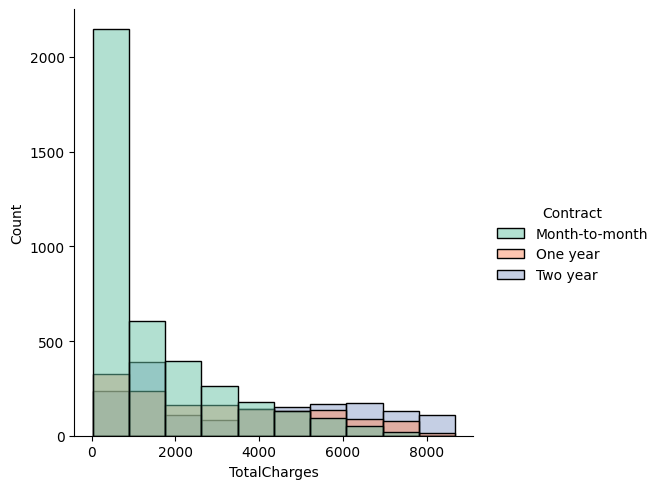

In [89]:
sns.displot(data = df, x = "TotalCharges", hue = "Contract", bins = 10)

большая доля M-to-M контрактов покрывает низкие суммы TotalCharges, затем наблюдаем резкий шифт

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Можно заметить, что теперь в TotalCharges появилось несколько пропущенных значений. Всего 7043 строки, а non-null значений у нас 7032. Откуда они взялись, до этого ведь не было? Все из-за того, что мы перевели этот столбец в число. Раньше все пропуски, т.е. NaN были текстом и поэтому не считались пропуском. Сейчас NaN имеет тип float, и мы уже понимаем, что это не реальное число, а пропущенное значение.



---



# Визуализация признаков


Рассмотрим способы визуализации в зависимости от типа признака: количественный, категориальный.

# Количественные признаки


Посмотрим, сколько клиенты платят в месяц за услуги. Более полную картину даст построение распределения.

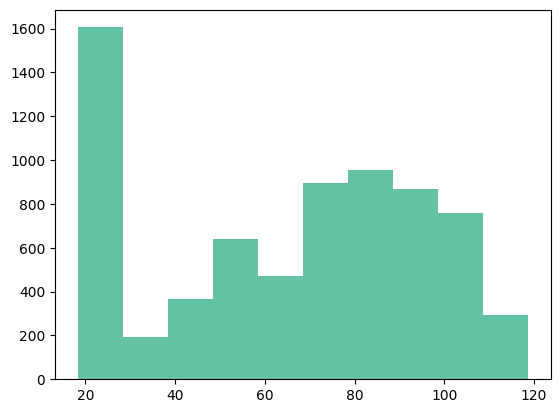

In [91]:
plt.hist(df['MonthlyCharges'])
# функция строит гистограмму
plt.show()

Пока не очень красиво, сложно читать, да и оси не подписаны. Продолжим тюнить картинку.

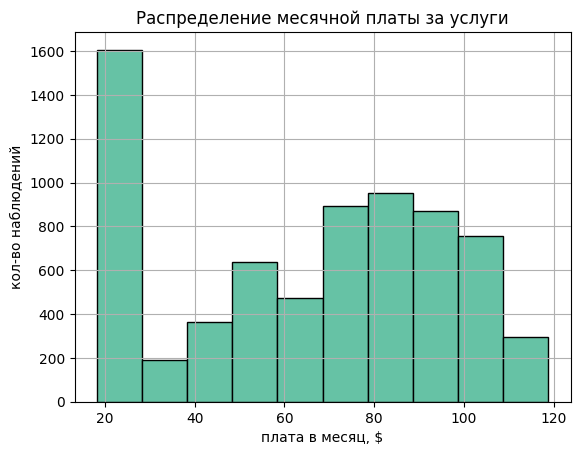

In [92]:
plt.hist(df['MonthlyCharges'], edgecolor='k')
plt.title('Распределение месячной платы за услуги')
plt.xlabel('плата в месяц, $')
plt.ylabel('кол-во наблюдений')
plt.grid()

Как читать гистограмму: по оси х - плата за услуги, по у - количество клиентов. Что мы тут видим: есть пик на 20 долларах, много клиентов платят такую сумму. Но основная масса распределена от 40 до 120$.

Построим то же самое, но с использованием библиотеки seaborn. 

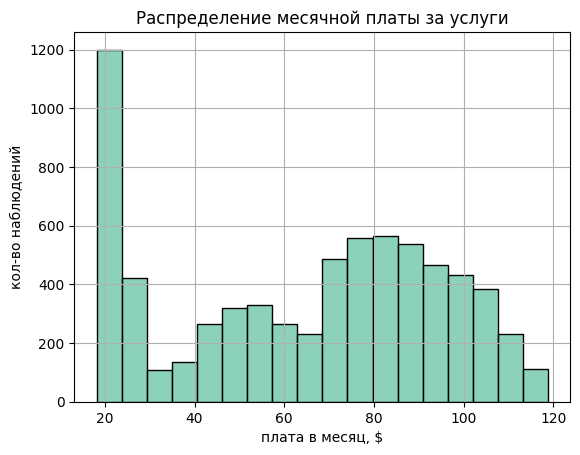

In [93]:
pic = sns.histplot(data=df,x='MonthlyCharges')
pic.set(xlabel ="плата в месяц, $", ylabel = "кол-во наблюдений", title ='Распределение месячной платы за услуги')
plt.grid()

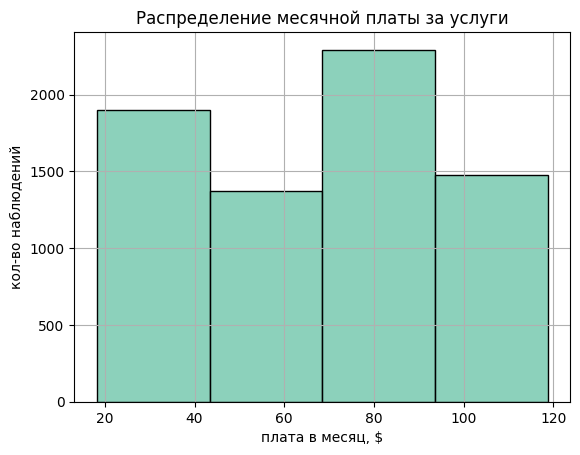

In [94]:
pic = sns.histplot(data=df,x='MonthlyCharges', bins=4)
pic.set(xlabel ="плата в месяц, $", ylabel = "кол-во наблюдений", title ='Распределение месячной платы за услуги')
plt.grid()

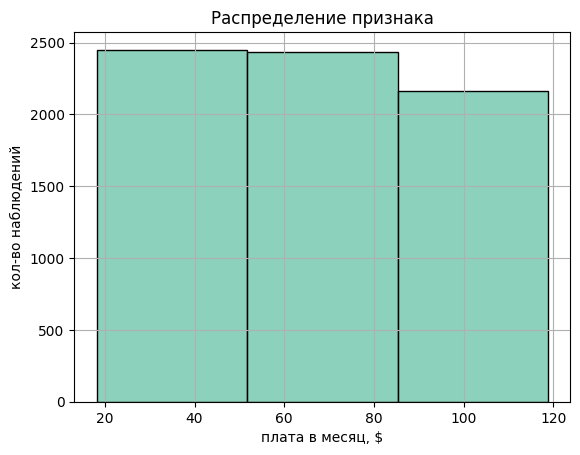

In [95]:
pic = sns.histplot(data=df,x='MonthlyCharges', bins=3)
pic.set(xlabel ="плата в месяц, $", ylabel = "кол-во наблюдений", title ='Распределение признака')
plt.grid()

Можно посмотреть в разбивке по какому-нибудь параметру. Например, по тому, является ли клиент пенсионером. Тогда SeniorCitizen=0 - пенсионеры.

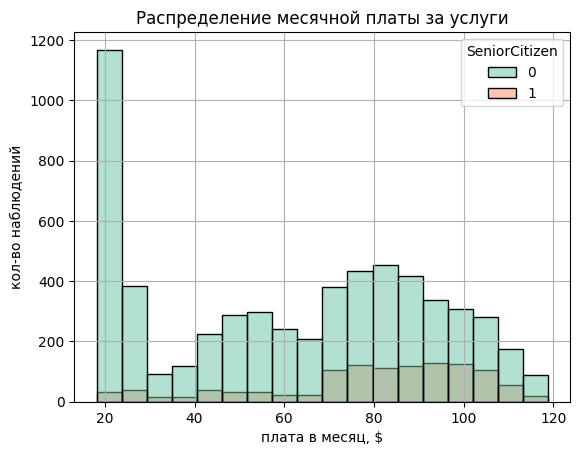

In [96]:
pic = sns.histplot(data=df,x='MonthlyCharges',hue='SeniorCitizen')
pic.set(xlabel ="плата в месяц, $", ylabel = "кол-во наблюдений", title ='Распределение месячной платы за услуги')
plt.grid()

Теперь построим то же самое, но используем библиотеку plotly. В этот раз картинка станет интерактивной.

In [97]:
# создаем объект - гистограмму
# nbinsx - параметр, которым можно задать количество бакетов, на которые хотим разбить распределение
hist = go.Histogram(x=df['MonthlyCharges'], nbinsx=20)
# создаем объект Figure и в него передаем нашу гистограмму
fig = go.Figure(data=hist) # разбить на 2 строки, чтобы было проще

fig.update_layout(
    width=600, # задаем размер графика
    height=400,
    title='Распределение платы за услуги компании',
    xaxis_title='плата за услуги, $',
    yaxis_title='кол-во наблюдений'
)
fig.show()

Можем построить гистограммы сразу по всем количественным признакам:

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:title={'center':'Churn'}>, <AxesSubplot:>]],
      dtype=object)

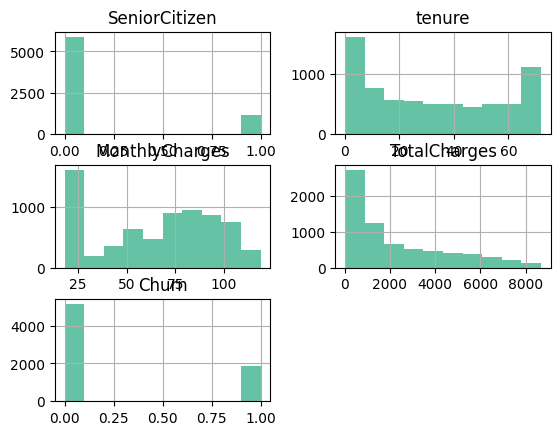

In [98]:
df.hist()

# Категориальные признаки

Посмотрим, какие у нас есть методы оплаты и какие из них самые популярные.

Распределение признака по частоте (можно добавить .head(), если признак принимает много значений):

In [99]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Визуализировать категориальный признак с помощью seaborn (нельзя использовать для количественного признака, будет очень долго работать):

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

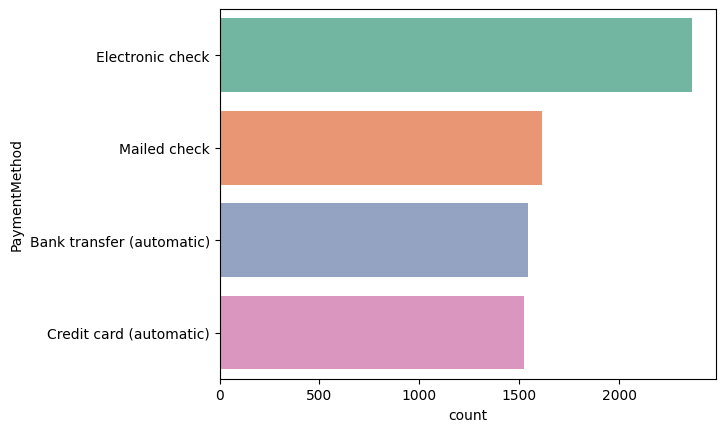

In [100]:
sns.countplot(y=df['PaymentMethod'])

Иногда бывает потребность нарисовать диаграмму не по всем значениям признака, а только по каким-то N. 
Нарисуем картинку по трем самым популярным способам оплаты. Определим значения признака, являющиеся тремя самыми часто встречающимися:

In [101]:
df['PaymentMethod'].value_counts().head(3).index

Index(['Electronic check', 'Mailed check', 'Bank transfer (automatic)'], dtype='object')

Сделаем фильтр на то, что способ оплаты находится среди самых популярных. Используем метод isin:

In [102]:
sns.countplot(df[df['PaymentMethod'].isin(df['PaymentMethod'].value_counts().head(3).index)]['PaymentMethod'])

ValueError: could not convert string to float: 'Electronic check'



---



# Взаимодействие признаков
Возможно три варианта:
количественный - количественный, количественный - категориальный (бинарный), категориальный - категориальный.

# Количественный - количественный

Попробуем построить линию.

Теперь хотим узнать, как зависят в среднем суммарные выплаты клиента от времени жизни с компанией. Логично предположить, что чем дольше у клиента подключены услуги, тем больше он заплатит. Проверим это:

In [103]:
# считаем, сколько в среднем нам заплатит 1 клиент в зависимости от кол-ва месяцев использования наших услуг
df1=df.groupby('tenure').agg({'TotalCharges':'mean'}).reset_index()

In [104]:
df1.head()

,tenure,TotalCharges
0,0,NaN
1,1,50.485808
2,2,114.332353
3,3,174.690000
4,4,230.530682


In [105]:
line = go.Scatter(x=df1['tenure'], y=df1['TotalCharges'], mode='lines')
fig = go.Figure(data=line)

fig.update_layout(
    autosize=False,
    width=700, # задаем размер графика
    height=400,
    title='Зависимость средних выплат клиента от времени жизни с компанией',
    xaxis_title='месяцев с подкл. услугами',
    yaxis_title='средние выплаты клиента'
)
fig.show()

Посмотрим дальше на диаграммы рассеяния. Построим их для всех количественных признаков:

In [ ]:
sns.pairplot(df)

Изобразим диаграмму рассеяния по двум переменным MonthlyCharges и tenure:

In [ ]:
plt.scatter(df['MonthlyCharges'],df['tenure']);
plt.xlabel('Месячная плата');
plt.ylabel('Срок жизни клиента в компании, мес.');

Раскрасим точки по факту оттока. Приведем в соответствие значение поля Churn и цвет:

In [ ]:
df['Churn'].map({'No': 'blue', 'Yes': 'orange'}).head()

Построим диаграмму рассеяния:

In [ ]:
plt.figure(figsize=(8,6)) # задаем размер
plt.scatter(df['MonthlyCharges'],df['tenure'], 
            color=df['Churn'].map({'No': 'blue', 'Yes': 'red'})
            ,alpha=0.6)
# alpha - параметр,задающий прозрачность точек
plt.title('Распределение срока жизни клиента и среднемесячной платы по тарифу')
plt.xlabel('Месячная плата по тарифу');
plt.ylabel('Срок жизни клиента в кампании, мес.')
plt.show()

Это наводит нас на гипотезу: клиенты, которые много платят и мало месяцев находятся в кампании, с большей вероятностью уйдут. 

Выделим клиентов, которые ушли, в отдельную диаграмму. Нужна фильтрация:

In [ ]:
df[df['Churn'] == 'Yes'].head() 

In [ ]:
l1 =plt.scatter(df[df['Churn'] == 'Yes']['MonthlyCharges'],df[df['Churn'] == 'Yes']['tenure'],color='orange');
plt.xlabel('Месячная плата');
plt.ylabel('Срок жизни клиента в кампании, мес.');
plt.title('Распределение срока жизни клиента и среднемесячной платы по тарифу у ушедших клиентов');

# Количественный - категориальный

Рассмотрим, различаются ли значения по признаку MonthlyCharges при каждом из значении Churn:

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)

Видим, что медианы сильно отличаются. Нам стоит обратить внимание на этот признак.

In [ ]:
sns.violinplot(x='Churn',y='MonthlyCharges',data=df);

Как это чудо читать: белая точка - это медиана. Толстая черная линия - межквартильный диапазон. Т.е. значения, которые укладываются между 25% и 75% персентилями. Тонкая черная линия показывает доверительный интервал с 95%-й вероятностью. Иными словами, 95% наблюдений находятся на этой линии. Чем толще скрипка, тем больше в этой точке наблюдений. 

Другой способ визуализации. Содержит больше информации, но график становится каким-то "зашумленным". Ни разу не встречал в работе такое. Все любят простые и понятные графики :)

# Категориальный - категориальный

Можно посмотреть в таблице объемы в разбивке по значениям признаков:

In [ ]:
# вводим новую числовую переменную для флага оттока churn_flag
df['churn_flag']=df['Churn'].map({'Yes':1, 'No':0})

In [106]:
table = pd.pivot_table(data=df, index='InternetService', columns='Contract', values='Churn', aggfunc='mean')
table

Contract,Month-to-month,One year,Two year
InternetService,,,
DSL,0.322159,0.092982,0.019108
Fiber optic,0.546053,0.192950,0.072261
No,0.188931,0.024725,0.007837


А теперь визуализируем эту таблицу хитмапом:

<AxesSubplot:xlabel='Contract', ylabel='InternetService'>

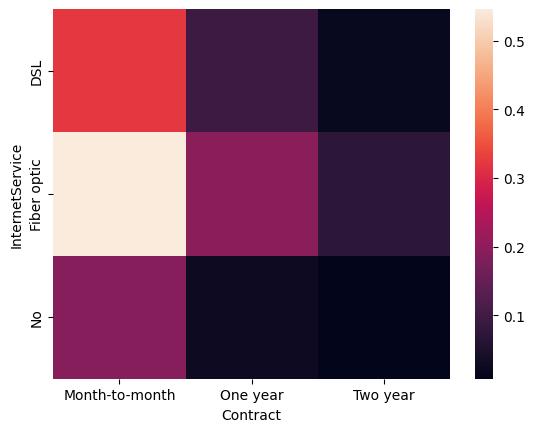

In [107]:
sns.heatmap(table)